In [13]:
#libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [14]:
# connection to database
db_name = 'db_autoimmune_disorders.db'
conn = sqlite3.connect(db_name)

# import data to DataFrame
query = "SELECT t.*,d.* FROM tbl_all_research_results t LEFT JOIN tbl_disorders_description d ON t.Diagnosis = d.Diseases_eng;"
df= pd.read_sql_query(query, conn)

# close connection
conn.close()

In [15]:
# glance at the first 5 rows of data frame
df.head(6) 

,Patient_ID,Age,Gender,Diagnosis,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,...,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_pl,Diseases_group,Description_eng,Description_pl
0,1,65,Female,Linear IgA disease,26,3.54,13.18,44.35,99.85,31.8,...,0,0,0,0,1,Linear IgA disease,Linijna choroba IgA,Skin and Mucosal Diseases,Linear IgA disease is a rare autoimmune disord...,Linijna choroba IgA to rzadkie zaburzenie auto...
1,2,61,Male,Dermatomyositis,106,4.97,14.73,42.39,94.86,29.94,...,1,0,0,0,2,Dermatomyositis,Dermatomyositis,Musculoskeletal Diseases,Dermatomyositis is an inflammatory disease cha...,Dermatomyositis to choroba zapalna charakteryz...
2,3,42,Male,Ord's thyroiditis,6,3.91,13.66,42.41,88.26,29.43,...,0,0,0,0,3,Ord's thyroiditis,Zapalenie tarczycy Orda,Thyroid and Endocrine Diseases,Ord's thyroiditis is a rare form of thyroiditi...,Zapalenie tarczycy Orda to rzadka forma zapale...
3,4,45,Female,Restless legs syndrome,11,4.57,14.96,40.1,85.95,27.42,...,0,0,0,0,4,Restless legs syndrome,Zespół niespokojnych nóg,Neurological Diseases,Restless legs syndrome is a condition that cau...,"Zespół niespokojnych nóg to stan, który powodu..."
4,5,78,Female,Autoimmune polyendocrine syndrome type 2 (APS2),30,4.88,11.21,37.58,93.16,29.87,...,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),Zespół poliendokrynny autoimmunologiczny typu ...,Thyroid and Endocrine Diseases,Autoimmune polyendocrine syndrome type 2 (APS2...,Autoimmunologiczny zespół poliendokrynny typu ...
5,6,62,Male,Autoimmune orchitis,41,4.75,13.37,43.11,101.91,28.41,...,0,0,0,0,6,Autoimmune orchitis,Autoimmunologiczne zapalenie jąder,Thyroid and Endocrine Diseases,Autoimmune orchitis is the inflammation of the...,Autoimmunologiczne zapalenie jąder to stan zap...


In [16]:
df['Patient_ID'].duplicated().sum()

0

In [17]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  object 
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12510 non-null  object 
 6   Hemoglobin                            12510 non-null  object 
 7   Hematocrit                            12510 non-null  object 
 8   MCV                                   12510 non-null  object 
 9   MCH                                   12510 non-null  object 
 10  MCHC                                  12510 non-null  float64
 11  RDW            

In [18]:
# checking columns with object type
for el in df.select_dtypes(include=['object']).columns.tolist():
    print(el)

# as we can see some of these columns shouldn't be object - Hemoglobin, Hematocrit, MCV, MCH, RDW, RBC_Count, Reticulocyte_Count should be float; Age, WBC_Count should be int

# changing type for float variables
float_list = ['Age','Hemoglobin','Hematocrit','MCV','MCH','RDW','RBC_Count','Reticulocyte_Count','WBC_Count']

for col in float_list:
    df[col] = np.where(df[col]=='', np.nan, df[col])
    df[col] = df[col].apply(float)
    
# replacing NaN values with 0 for Age and WBC_Count
df[['Age','WBC_Count']] = np.where(df[['Age','WBC_Count']].isna(), 0, df[['Age','WBC_Count']])

# changing type for Age and WBC_Count into int64
df[['Age','WBC_Count']] = df[['Age','WBC_Count']].astype(np.int64)


Age
Gender
Diagnosis
RBC_Count
Hemoglobin
Hematocrit
MCV
MCH
RDW
Reticulocyte_Count
WBC_Count
Diseases_eng
Diseases_pl
Diseases_group
Description_eng
Description_pl


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 85 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            12510 non-null  int64  
 1   Age                                   12510 non-null  int64  
 2   Gender                                12510 non-null  object 
 3   Diagnosis                             12510 non-null  object 
 4   Sickness_Duration_Months              12510 non-null  int64  
 5   RBC_Count                             12509 non-null  float64
 6   Hemoglobin                            12508 non-null  float64
 7   Hematocrit                            12508 non-null  float64
 8   MCV                                   12507 non-null  float64
 9   MCH                                   12506 non-null  float64
 10  MCHC                                  12510 non-null  float64
 11  RDW            

In [20]:
# looking at the NaN values and assigning all of them to their variables
nan_dict = {}

for col in list(df.columns):
    nan_dict[col] = df[col].isna().sum()
    
nan_dict

{'Patient_ID': 0,
 'Age': 0,
 'Gender': 0,
 'Diagnosis': 0,
 'Sickness_Duration_Months': 0,
 'RBC_Count': 1,
 'Hemoglobin': 2,
 'Hematocrit': 2,
 'MCV': 3,
 'MCH': 4,
 'MCHC': 0,
 'RDW': 4,
 'Reticulocyte_Count': 5,
 'WBC_Count': 0,
 'Neutrophils': 0,
 'Lymphocytes': 0,
 'Monocytes': 0,
 'Eosinophils': 0,
 'Basophils': 0,
 'PLT_Count': 0,
 'MPV': 0,
 'ANA': 0,
 'Esbach': 0,
 'MBL_Level': 0,
 'ESR': 0,
 'C3': 0,
 'C4': 0,
 'CRP': 0,
 'Anti-dsDNA': 2510,
 'Anti-Sm': 2510,
 'Rheumatoid factor': 2510,
 'ACPA': 2510,
 'Anti-TPO': 2510,
 'Anti-Tg': 2510,
 'Anti-SMA': 2510,
 'Low-grade fever': 0,
 'Fatigue or chronic tiredness': 0,
 'Dizziness': 0,
 'Weight loss': 0,
 'Rashes and skin lesions': 0,
 'Stiffness in the joints': 0,
 'Brittle hair or hair loss': 0,
 'Dry eyes and/or mouth': 0,
 'General unwell feeling': 0,
 'Joint pain': 0,
 'Anti_dsDNA': 0,
 'Anti_enterocyte_antibodies': 0,
 'anti_LKM1': 0,
 'Anti_RNP': 0,
 'ASCA': 0,
 'Anti_Ro_SSA': 0,
 'Anti_CBir1': 0,
 'Anti_BP230': 0,
 'Anti_

In [21]:
# defining which columns have significant (above 100 observations) number of NaNs 
nans_above_100 = []

for key in nan_dict.keys():
    if nan_dict[key] > 100:
        nans_above_100.append(key)
    else:
        continue

print(nans_above_100)

# other variables
nans_below_100 = []

for key in nan_dict.keys():
    if key not in nans_above_100:
        nans_below_100.append(key)
    else:
        continue

print(nans_below_100)

['Anti-dsDNA', 'Anti-Sm', 'Rheumatoid factor', 'ACPA', 'Anti-TPO', 'Anti-Tg', 'Anti-SMA']
['Patient_ID', 'Age', 'Gender', 'Diagnosis', 'Sickness_Duration_Months', 'RBC_Count', 'Hemoglobin', 'Hematocrit', 'MCV', 'MCH', 'MCHC', 'RDW', 'Reticulocyte_Count', 'WBC_Count', 'Neutrophils', 'Lymphocytes', 'Monocytes', 'Eosinophils', 'Basophils', 'PLT_Count', 'MPV', 'ANA', 'Esbach', 'MBL_Level', 'ESR', 'C3', 'C4', 'CRP', 'Low-grade fever', 'Fatigue or chronic tiredness', 'Dizziness', 'Weight loss', 'Rashes and skin lesions', 'Stiffness in the joints', 'Brittle hair or hair loss', 'Dry eyes and/or mouth', 'General unwell feeling', 'Joint pain', 'Anti_dsDNA', 'Anti_enterocyte_antibodies', 'anti_LKM1', 'Anti_RNP', 'ASCA', 'Anti_Ro_SSA', 'Anti_CBir1', 'Anti_BP230', 'Anti_tTG', 'DGP', 'Anti_BP180', 'ASMA', 'Anti_IF', 'IgG_IgE_receptor', 'Anti_SRP', 'Anti_desmoglein_3', 'Anti_La_SSB', 'Anti_Jo1', 'ANCA', 'anti_centromere', 'Anti_desmoglein_1', 'EMA', 'Anti_type_VII_collagen', 'C1_inhibitor', 'Anti_TIF

In [22]:
# we can drop without consequences nan observations for column in nans_below_100
df = df[nans_below_100].dropna()

In [23]:
# filling NaNs with 0 for nans_above_100
df = df.fillna(0)

In [24]:
# unique values for diagnosis and their id 
diagnosis_dictionary = df[['Diseases_group']].drop_duplicates().reset_index(drop=True)
diagnosis_dictionary['Diseases_group_id'] = diagnosis_dictionary['Diseases_group'].astype('category').cat.codes
diagnosis_dictionary

,Diseases_group,Diseases_group_id
0,Skin and Mucosal Diseases,7
1,Musculoskeletal Diseases,4
2,Thyroid and Endocrine Diseases,8
3,Neurological Diseases,5
4,Miscellaneous,3
5,Vascular Diseases,9
6,Kidney and Urinary Diseases,2
7,Gastrointestinal and Liver Diseases,0
8,Immune System Diseases,1
9,Normal,6


In [25]:
# count values for each Diseases_group in oue dataset
dis_group_counts = np.unique(df['Diseases_group'], return_counts=True)

print(f'We have {len(dis_group_counts[0])} groups of autoimmune diseases in our dataset\n')

for el, count in zip(dis_group_counts[0],dis_group_counts[1]):
    print(f'{el}: {count}')

We have 10 groups of autoimmune diseases in our dataset

Gastrointestinal and Liver Diseases: 561
Immune System Diseases: 514
Kidney and Urinary Diseases: 431
Miscellaneous: 1258
Musculoskeletal Diseases: 1106
Neurological Diseases: 2122
Normal: 2499
Skin and Mucosal Diseases: 1387
Thyroid and Endocrine Diseases: 1222
Vascular Diseases: 1399


In [26]:
# columns to drop
columns_to_drop = ['Patient_ID','Diseases_eng','Diagnosis','Diseases_pl','Diseases_ID','Description_eng','Description_pl','Recommendation']

# dropping above columns
df = df.drop(columns=columns_to_drop, errors='ignore', axis=1)

In [27]:
# numerical variables in our dataset
numeric_var = [el for el in df.select_dtypes(include=['float64','int64']).columns if el in nans_below_100]
numeric_var

['Age',
 'Sickness_Duration_Months',
 'RBC_Count',
 'Hemoglobin',
 'Hematocrit',
 'MCV',
 'MCH',
 'MCHC',
 'RDW',
 'Reticulocyte_Count',
 'WBC_Count',
 'Neutrophils',
 'Lymphocytes',
 'Monocytes',
 'Eosinophils',
 'Basophils',
 'PLT_Count',
 'MPV',
 'ANA',
 'Esbach',
 'MBL_Level',
 'ESR',
 'C3',
 'C4',
 'CRP',
 'Low-grade fever',
 'Fatigue or chronic tiredness',
 'Dizziness',
 'Weight loss',
 'Rashes and skin lesions',
 'Stiffness in the joints',
 'Brittle hair or hair loss',
 'Dry eyes and/or mouth',
 'General unwell feeling',
 'Joint pain',
 'Anti_dsDNA',
 'Anti_enterocyte_antibodies',
 'anti_LKM1',
 'Anti_RNP',
 'ASCA',
 'Anti_Ro_SSA',
 'Anti_CBir1',
 'Anti_BP230',
 'Anti_tTG',
 'DGP',
 'Anti_BP180',
 'ASMA',
 'Anti_IF',
 'IgG_IgE_receptor',
 'Anti_SRP',
 'Anti_desmoglein_3',
 'Anti_La_SSB',
 'Anti_Jo1',
 'ANCA',
 'anti_centromere',
 'Anti_desmoglein_1',
 'EMA',
 'Anti_type_VII_collagen',
 'C1_inhibitor',
 'Anti_TIF1',
 'Anti_epidermal_basement_membrane_IgA',
 'Anti_OmpC',
 'pANCA',

In [28]:
for var in list(['Age','Sickness_Duration_Months','WBC_Count','PLT_Count','ESR']):
    df[var] = df[var].apply(float)

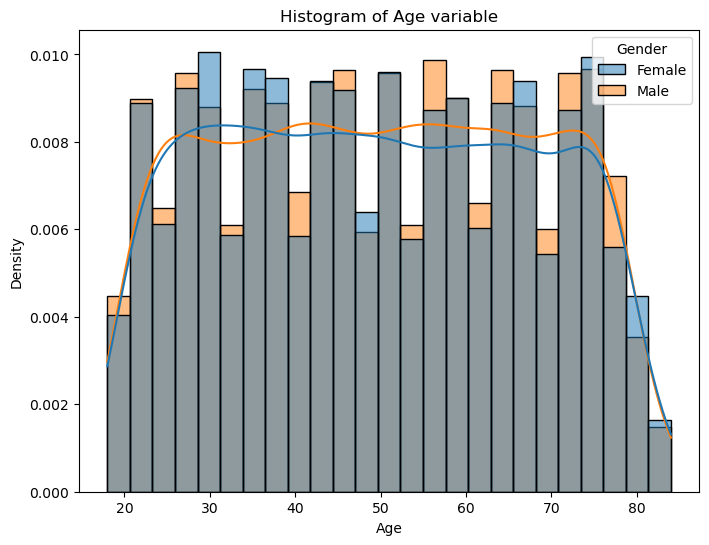

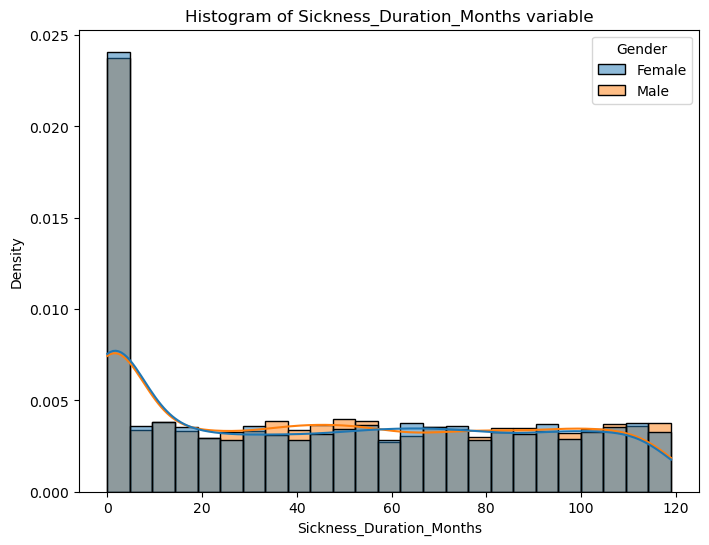

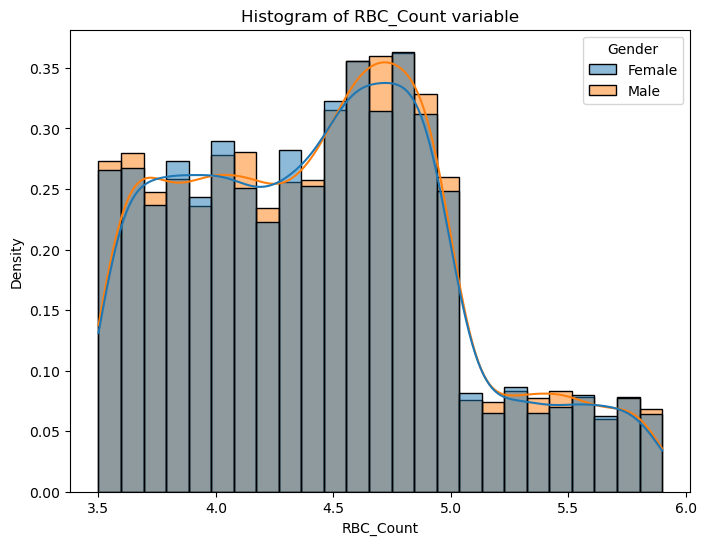

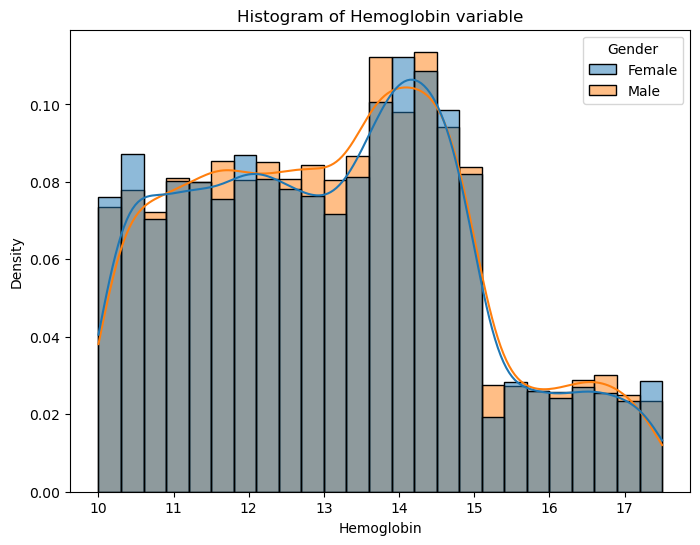

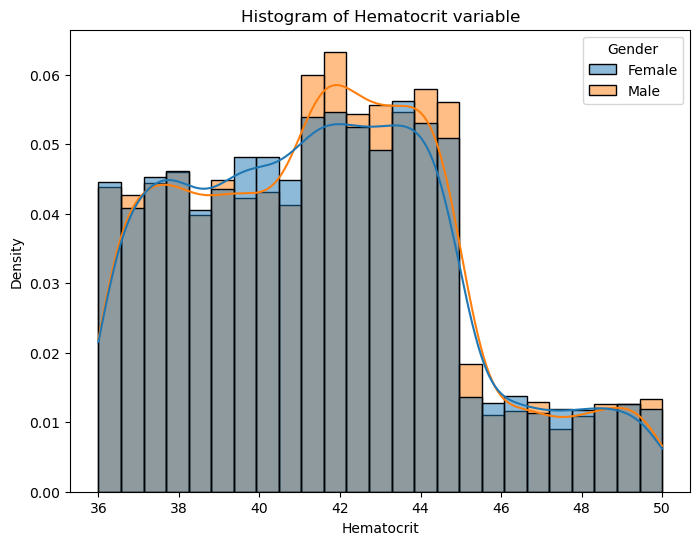

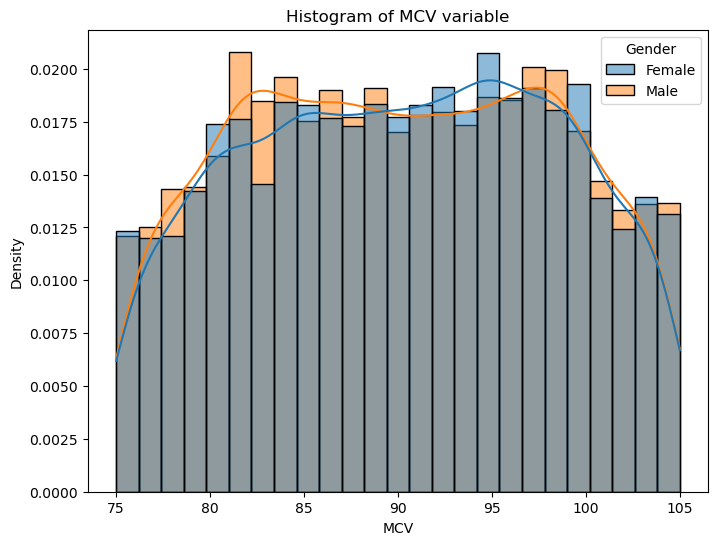

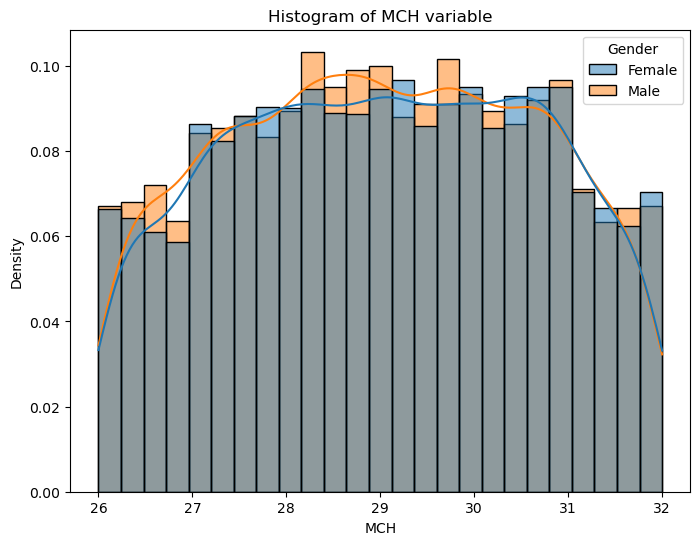

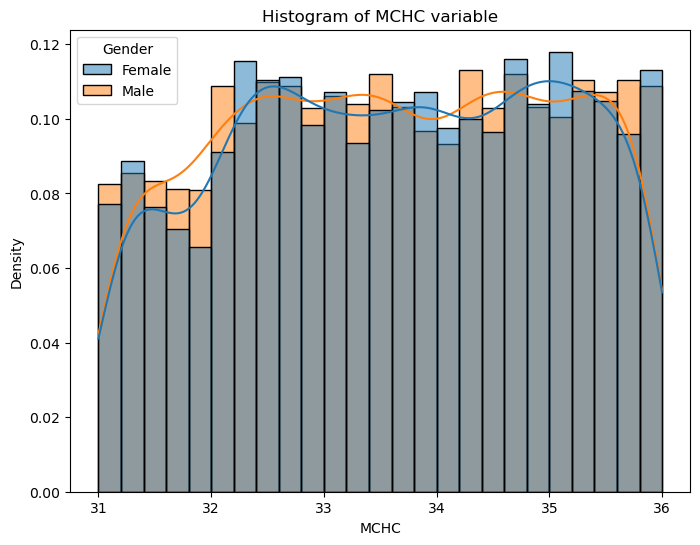

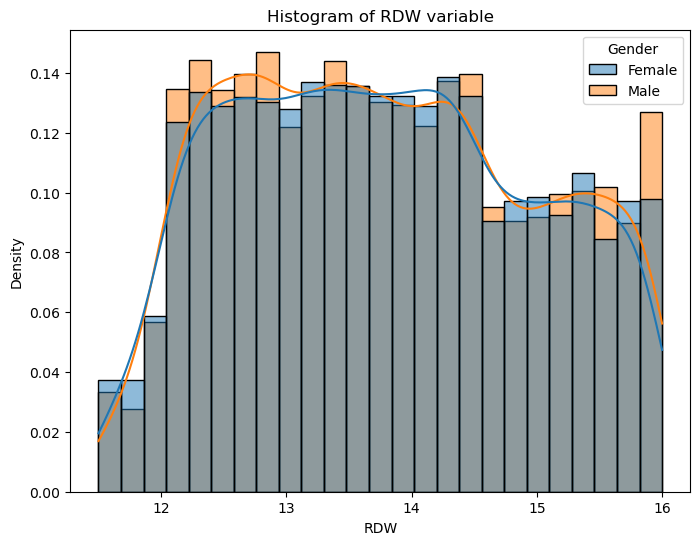

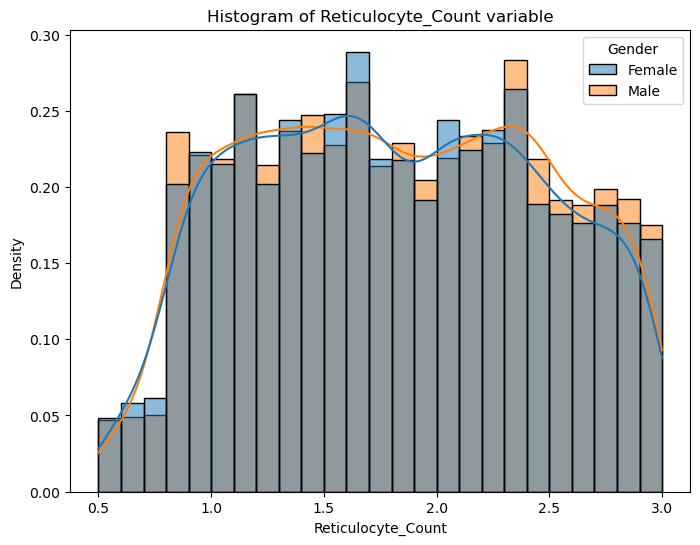

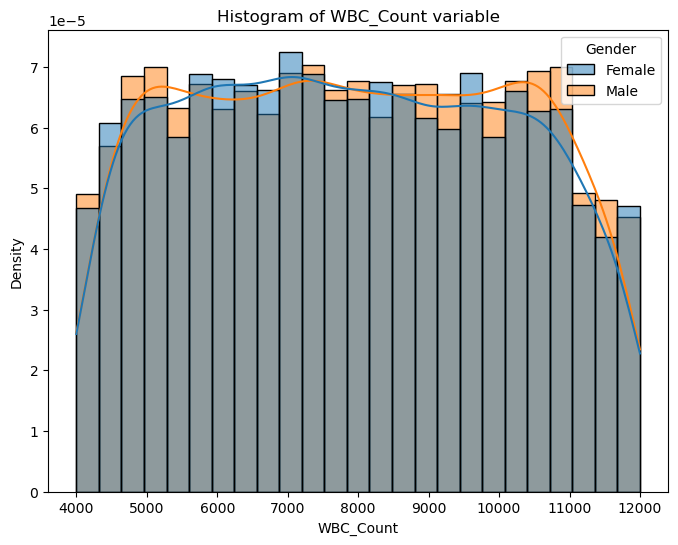

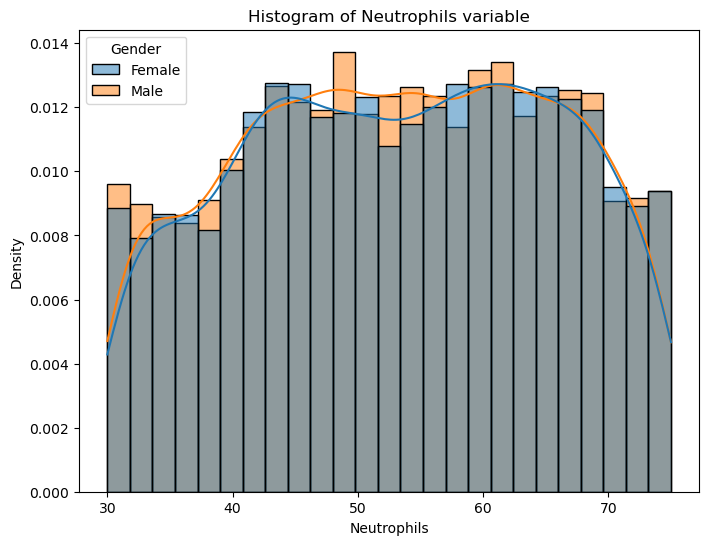

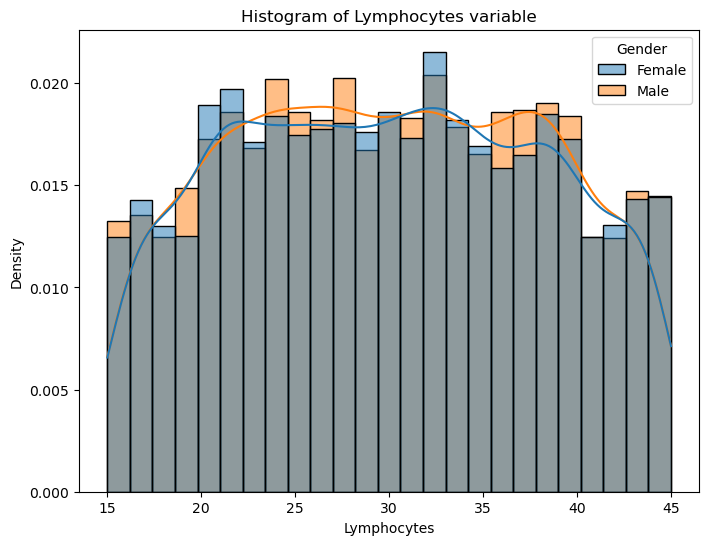

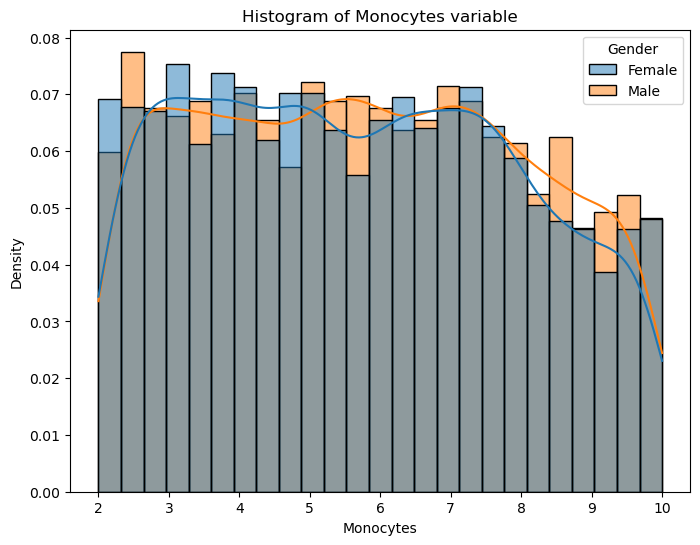

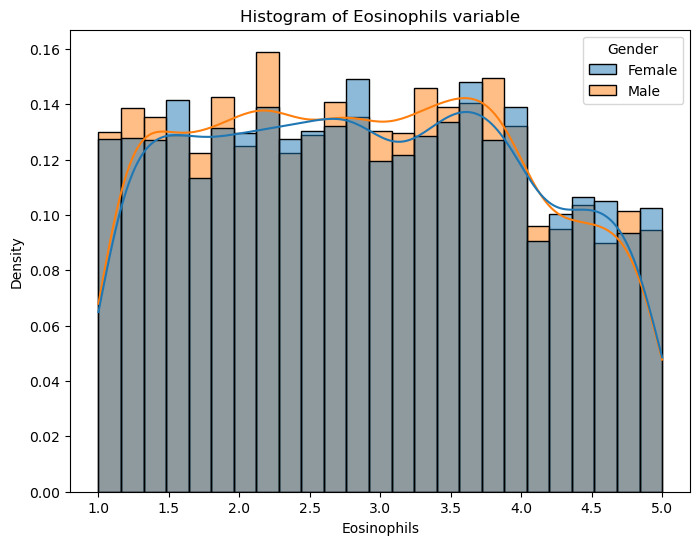

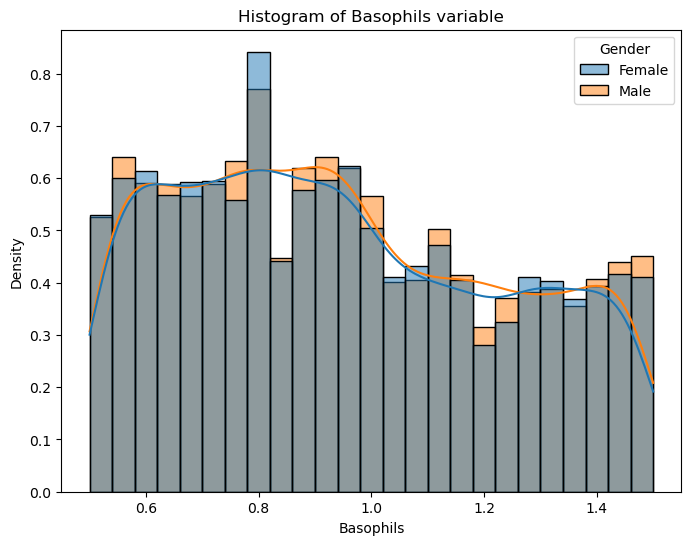

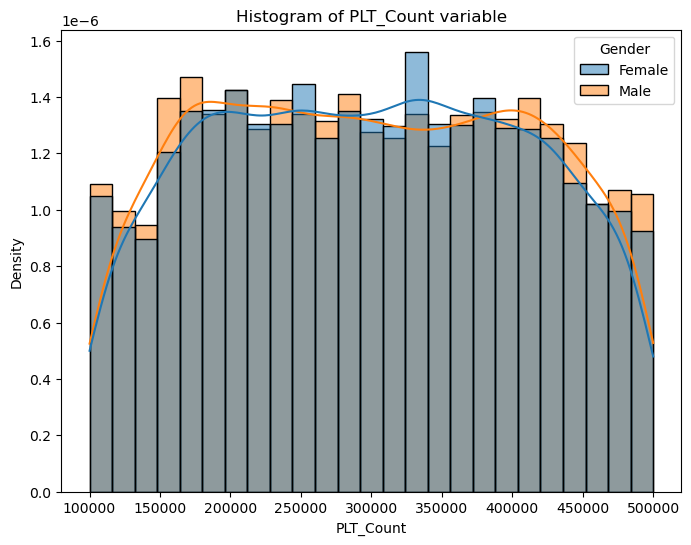

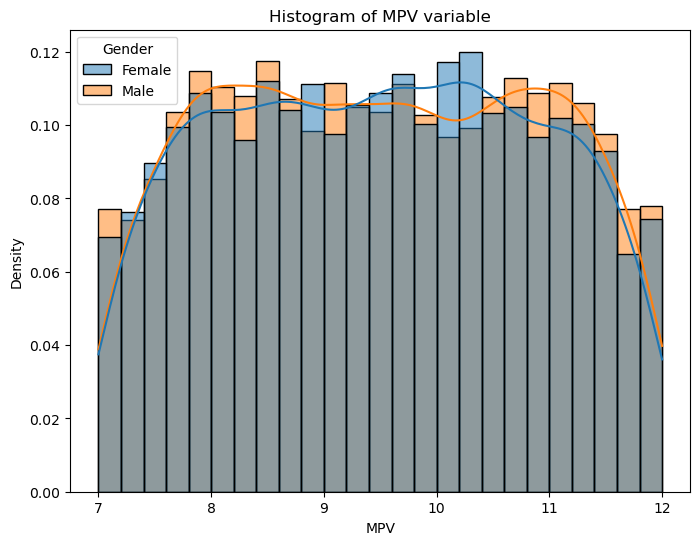

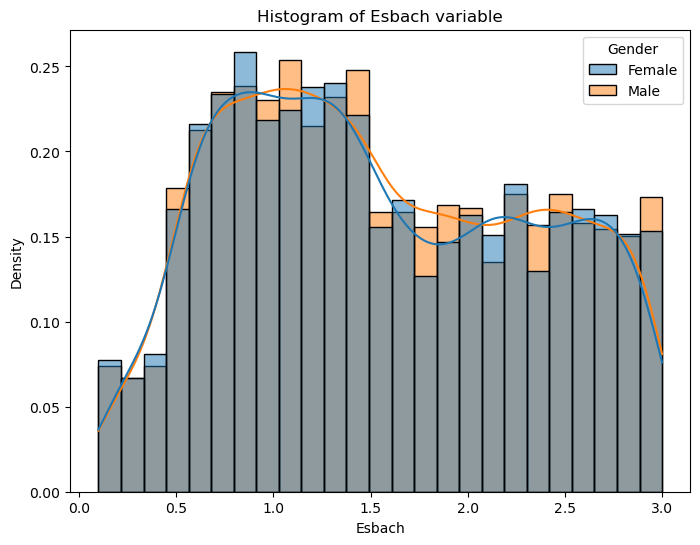

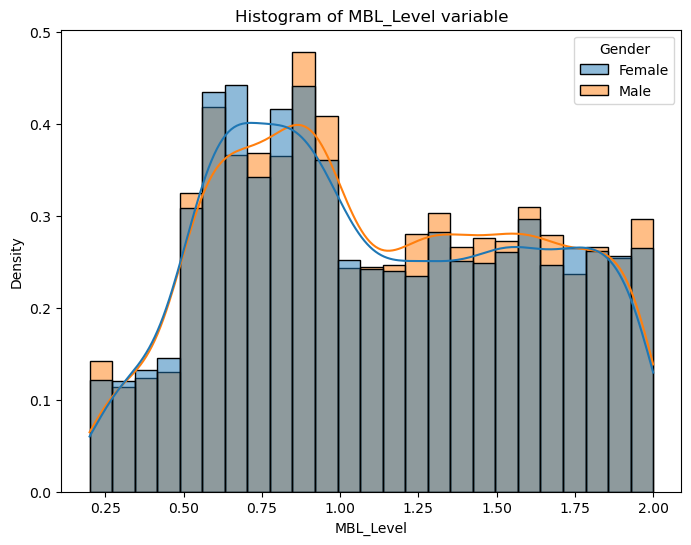

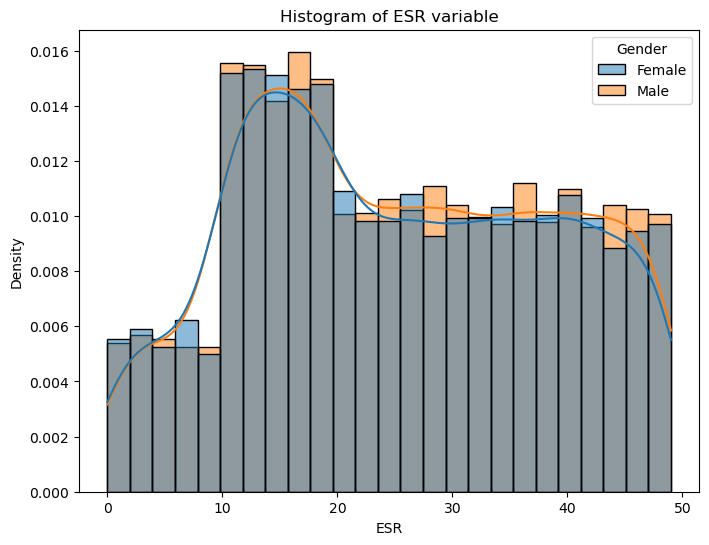

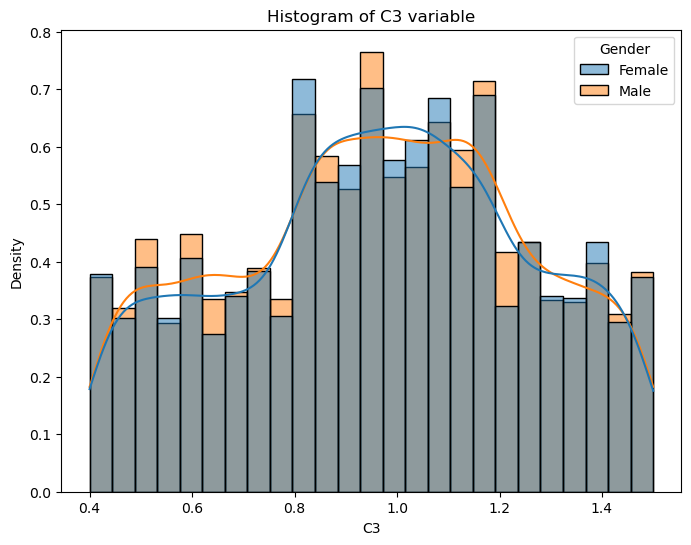

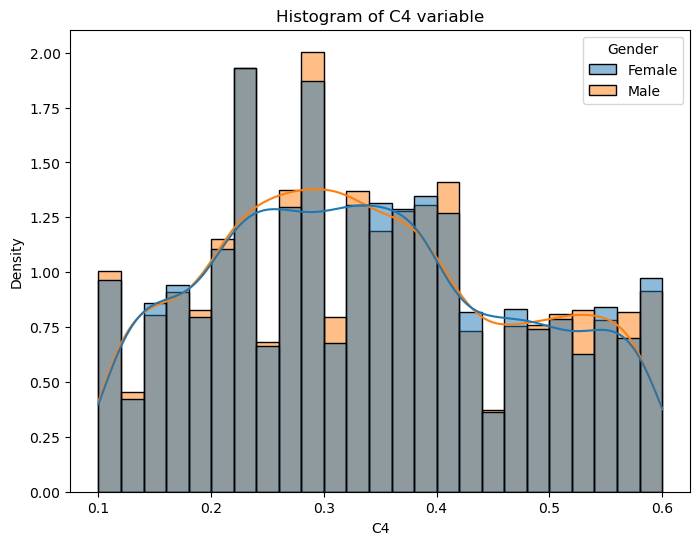

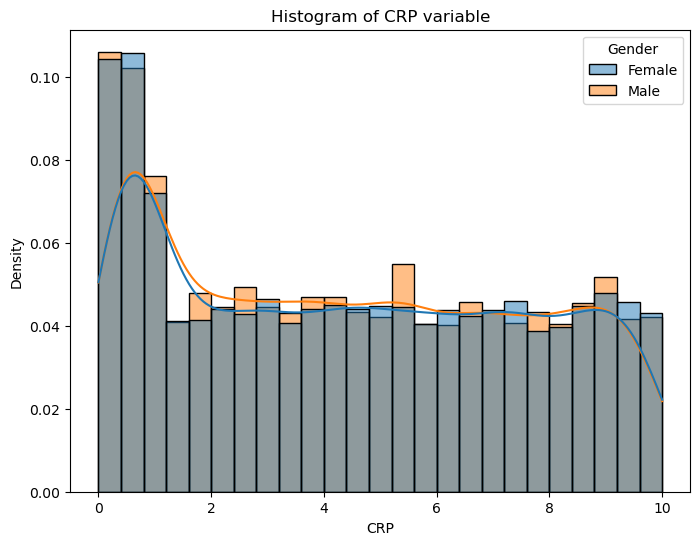

In [29]:
# histograms for numerical variables
for var in list(df.select_dtypes(include='float64').columns):
    plt.figure(figsize=(8,6))
    sns.histplot(df, x=var, bins=25, hue='Gender', kde=True, stat='density')
    plt.title(f'Histogram of {var} variable')
    plt.show()

In [30]:
df['Diseases_group'] = df['Diseases_group'].astype('category').cat.codes

In [31]:
df['Gender'] = np.where(df['Gender'] == 'Female',1,0)

In [32]:
numeric_data = df.select_dtypes(include=['float64'])

In [34]:
df['Diseases_group']

0        7
1        4
2        8
3        5
4        8
        ..
12494    6
12495    6
12496    6
12497    6
12498    6
Name: Diseases_group, Length: 12499, dtype: int8

In [81]:
numeric_data = df.select_dtypes(include=['float64','int8'])
numeric_data

,Age,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,...,Basophils,PLT_Count,MPV,Esbach,MBL_Level,ESR,C3,C4,CRP,Diseases_group
0,65.0,26.0,3.54,13.18,44.35,99.85,31.80,33.12,12.52,2.08,...,1.08,429117.0,8.08,1.50,1.81,40.0,1.32,0.49,3.10,7
1,61.0,106.0,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,...,1.16,487184.0,8.92,1.76,1.08,23.0,0.40,0.17,2.73,4
2,42.0,6.0,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,...,1.07,499962.0,7.70,2.49,1.42,44.0,0.95,0.26,1.02,8
3,45.0,11.0,4.57,14.96,40.10,85.95,27.42,33.93,12.14,1.79,...,0.72,129793.0,10.95,0.75,1.05,25.0,1.06,0.26,5.45,5
4,78.0,30.0,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,...,1.40,467390.0,10.51,0.76,1.14,42.0,0.73,0.25,1.05,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,49.0,0.0,5.22,14.42,48.42,91.66,30.60,32.86,12.03,2.27,...,0.50,215737.0,7.90,1.20,0.41,2.0,0.84,0.39,0.84,6
12495,54.0,0.0,4.51,17.17,42.46,94.95,27.96,33.51,11.58,2.09,...,0.60,437118.0,10.00,0.79,0.24,13.0,0.83,0.25,0.81,6
12496,29.0,0.0,4.62,13.72,43.65,94.54,31.00,33.55,12.25,1.48,...,0.67,353269.0,8.21,1.34,0.37,10.0,0.95,0.33,0.64,6
12497,34.0,0.0,4.95,15.37,41.78,84.67,30.94,34.39,13.14,1.13,...,0.81,234526.0,8.58,1.33,0.33,19.0,0.94,0.38,0.46,6


In [82]:
categorical_data = df.select_dtypes(include=['int64','int32','int8'])
categorical_data

,Gender,ANA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,...,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_group
0,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,4
2,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
4,1,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [73]:
categorical_data

,Gender,ANA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,...,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_group
0,1,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,0,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,4
2,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1,1,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
4,1,1,0,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
12497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [74]:
numeric_data

,Age,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,...,Basophils,PLT_Count,MPV,Esbach,MBL_Level,ESR,C3,C4,CRP,Diseases_group
0,65.0,26.0,3.54,13.18,44.35,99.85,31.80,33.12,12.52,2.08,...,1.08,429117.0,8.08,1.50,1.81,40.0,1.32,0.49,3.10,7
1,61.0,106.0,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,...,1.16,487184.0,8.92,1.76,1.08,23.0,0.40,0.17,2.73,4
2,42.0,6.0,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,...,1.07,499962.0,7.70,2.49,1.42,44.0,0.95,0.26,1.02,8
3,45.0,11.0,4.57,14.96,40.10,85.95,27.42,33.93,12.14,1.79,...,0.72,129793.0,10.95,0.75,1.05,25.0,1.06,0.26,5.45,5
4,78.0,30.0,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,...,1.40,467390.0,10.51,0.76,1.14,42.0,0.73,0.25,1.05,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,49.0,0.0,5.22,14.42,48.42,91.66,30.60,32.86,12.03,2.27,...,0.50,215737.0,7.90,1.20,0.41,2.0,0.84,0.39,0.84,6
12495,54.0,0.0,4.51,17.17,42.46,94.95,27.96,33.51,11.58,2.09,...,0.60,437118.0,10.00,0.79,0.24,13.0,0.83,0.25,0.81,6
12496,29.0,0.0,4.62,13.72,43.65,94.54,31.00,33.55,12.25,1.48,...,0.67,353269.0,8.21,1.34,0.37,10.0,0.95,0.33,0.64,6
12497,34.0,0.0,4.95,15.37,41.78,84.67,30.94,34.39,13.14,1.13,...,0.81,234526.0,8.58,1.33,0.33,19.0,0.94,0.38,0.46,6


In [ ]:
# diseases = pd.get_dummies(numeric_data['Diseases_group'], prefix='Disease')
# diseases

,Disease_0,Disease_1,Disease_2,Disease_3,Disease_4,Disease_5,Disease_6,Disease_7,Disease_8,Disease_9
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
12494,False,False,False,False,False,False,True,False,False,False
12495,False,False,False,False,False,False,True,False,False,False
12496,False,False,False,False,False,False,True,False,False,False
12497,False,False,False,False,False,False,True,False,False,False


In [ ]:
# numeric_data = numeric_data.drop(columns='Diseases_group', axis=1)

In [ ]:
# numeric_data_prim = pd.concat([numeric_data, diseases], axis=1)
# numeric_data_prim

,Age,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,...,Disease_0,Disease_1,Disease_2,Disease_3,Disease_4,Disease_5,Disease_6,Disease_7,Disease_8,Disease_9
0,65.0,26.0,3.54,13.18,44.35,99.85,31.80,33.12,12.52,2.08,...,False,False,False,False,False,False,False,True,False,False
1,61.0,106.0,4.97,14.73,42.39,94.86,29.94,31.07,15.15,1.21,...,False,False,False,False,True,False,False,False,False,False
2,42.0,6.0,3.91,13.66,42.41,88.26,29.43,35.61,15.52,2.68,...,False,False,False,False,False,False,False,False,True,False
3,45.0,11.0,4.57,14.96,40.10,85.95,27.42,33.93,12.14,1.79,...,False,False,False,False,False,True,False,False,False,False
4,78.0,30.0,4.88,11.21,37.58,93.16,29.87,31.29,15.65,1.42,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12494,49.0,0.0,5.22,14.42,48.42,91.66,30.60,32.86,12.03,2.27,...,False,False,False,False,False,False,True,False,False,False
12495,54.0,0.0,4.51,17.17,42.46,94.95,27.96,33.51,11.58,2.09,...,False,False,False,False,False,False,True,False,False,False
12496,29.0,0.0,4.62,13.72,43.65,94.54,31.00,33.55,12.25,1.48,...,False,False,False,False,False,False,True,False,False,False
12497,34.0,0.0,4.95,15.37,41.78,84.67,30.94,34.39,13.14,1.13,...,False,False,False,False,False,False,True,False,False,False


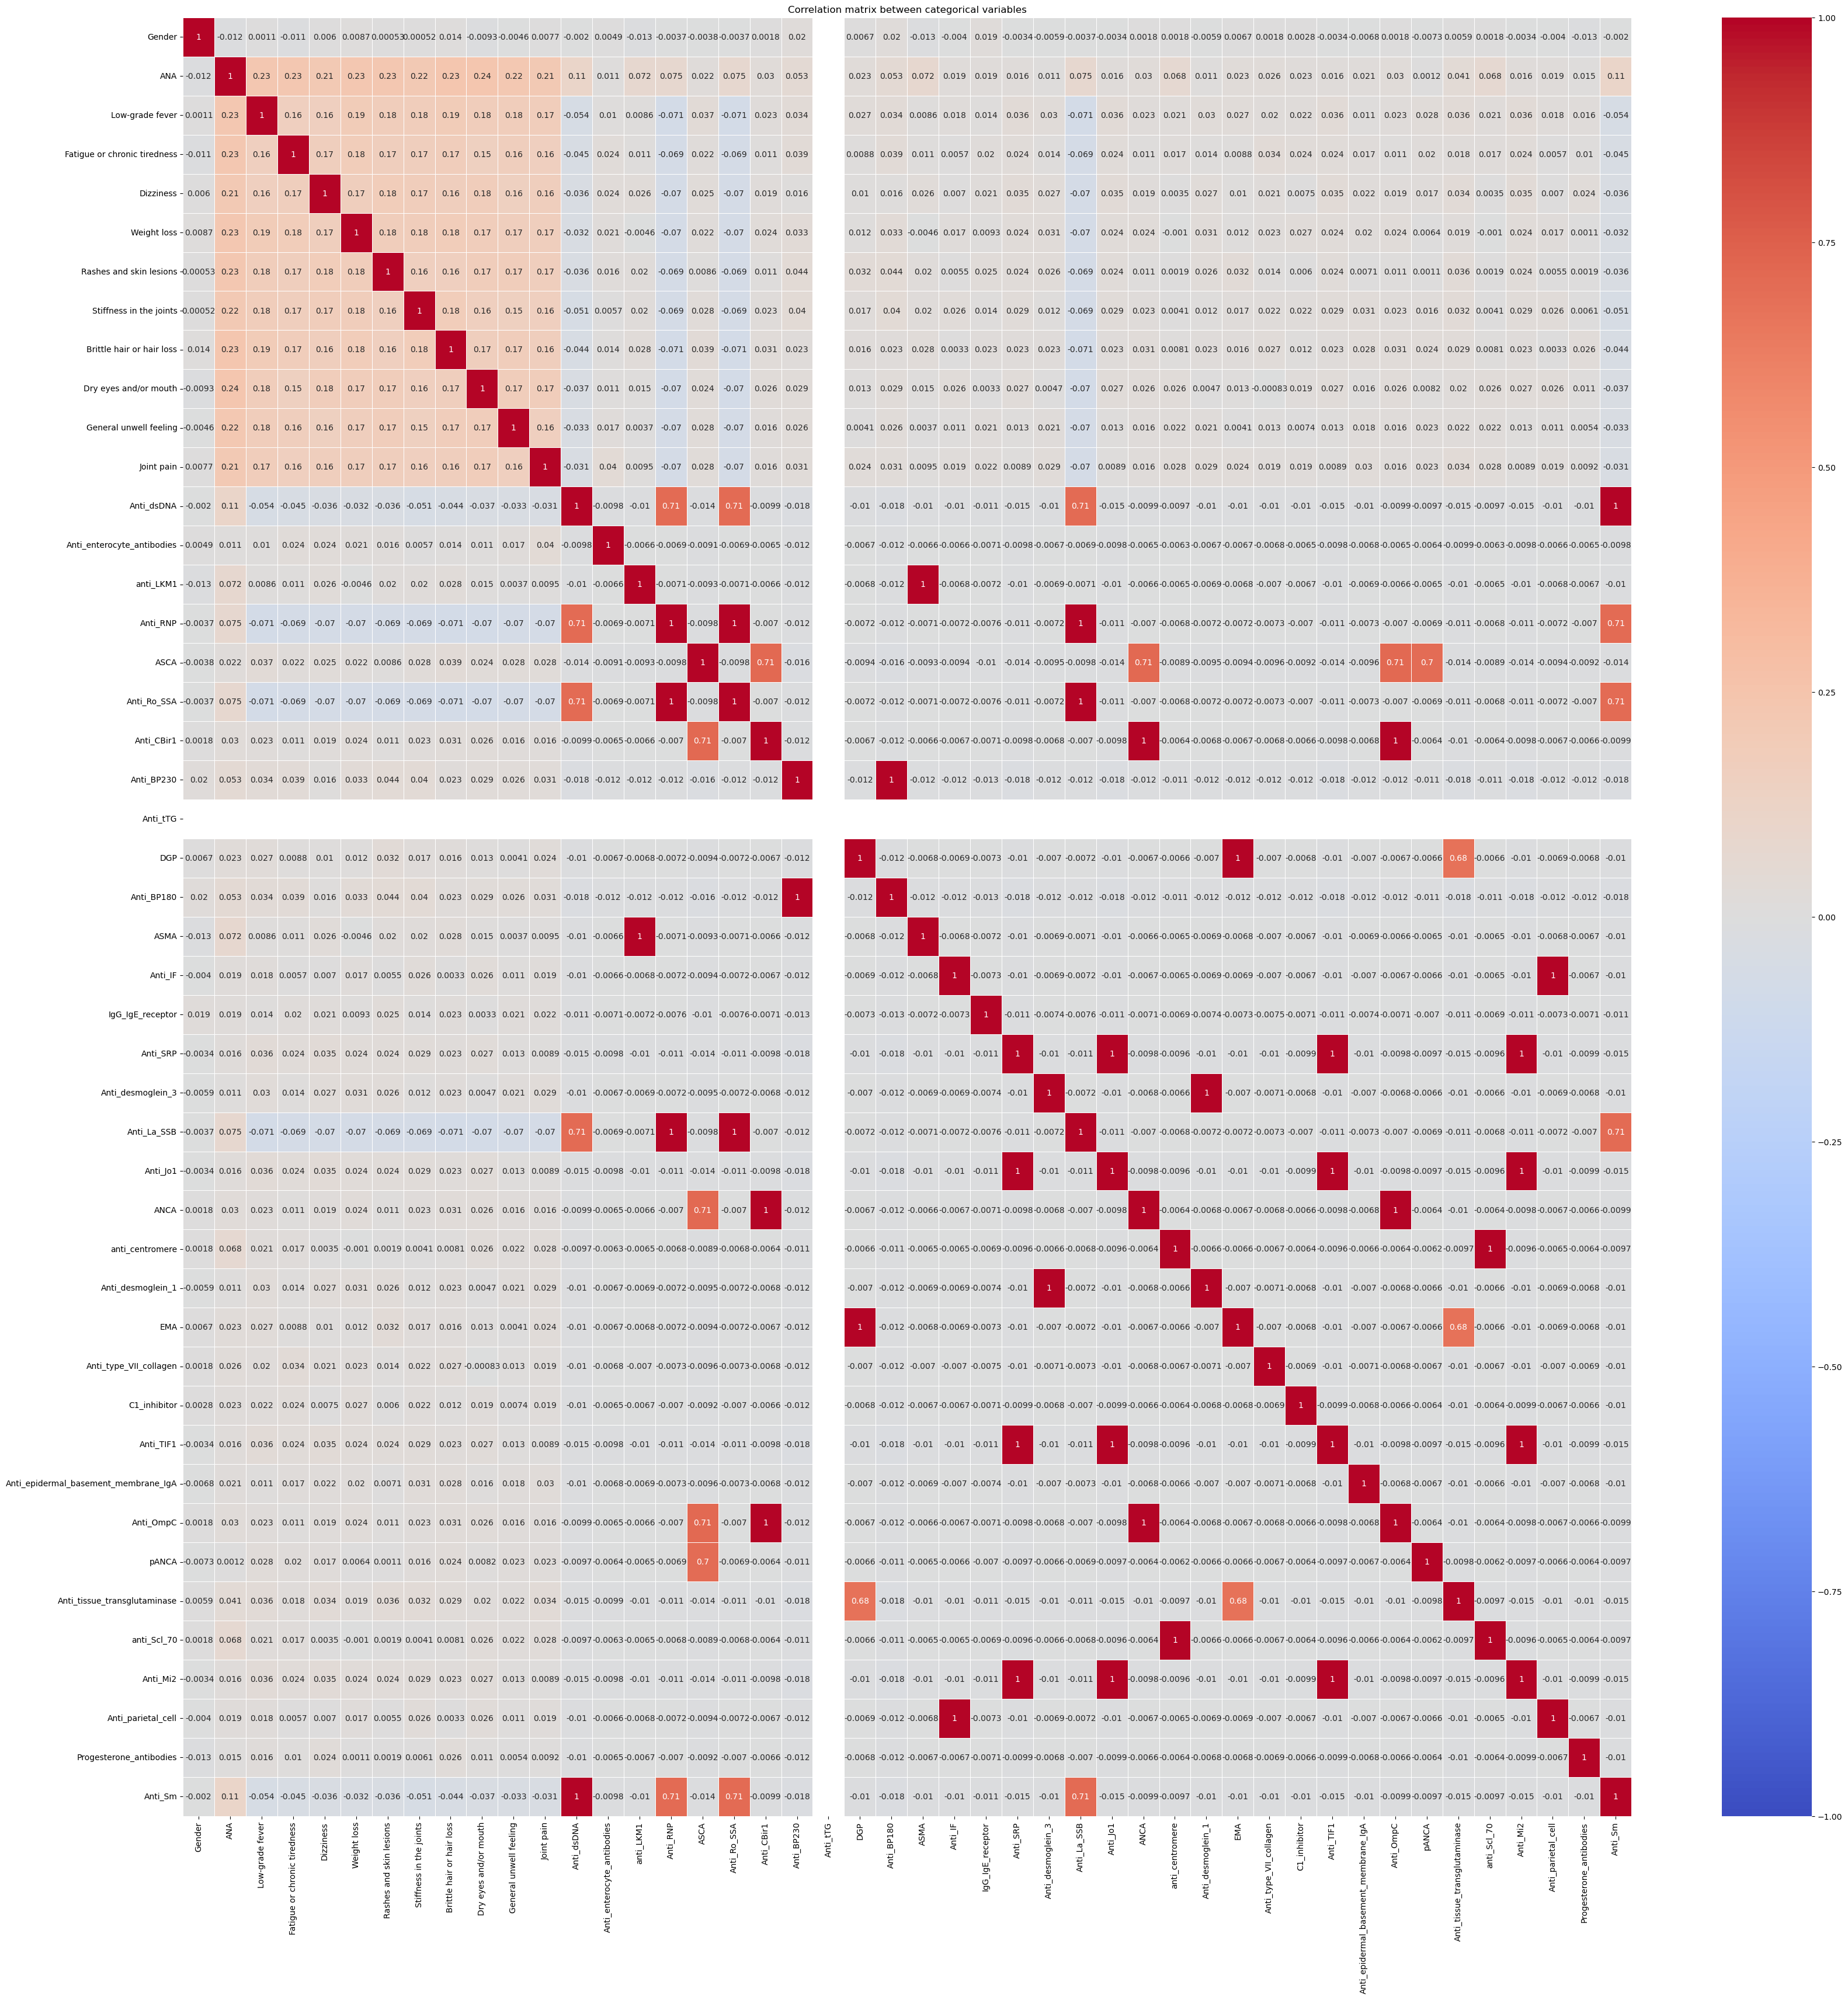

In [83]:
cat_var_corr_matrix = categorical_data.drop(columns='Diseases_group',axis=1).corr(method='spearman')

plt.figure(figsize=(40,40))
sns.heatmap(cat_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables')
plt.show()

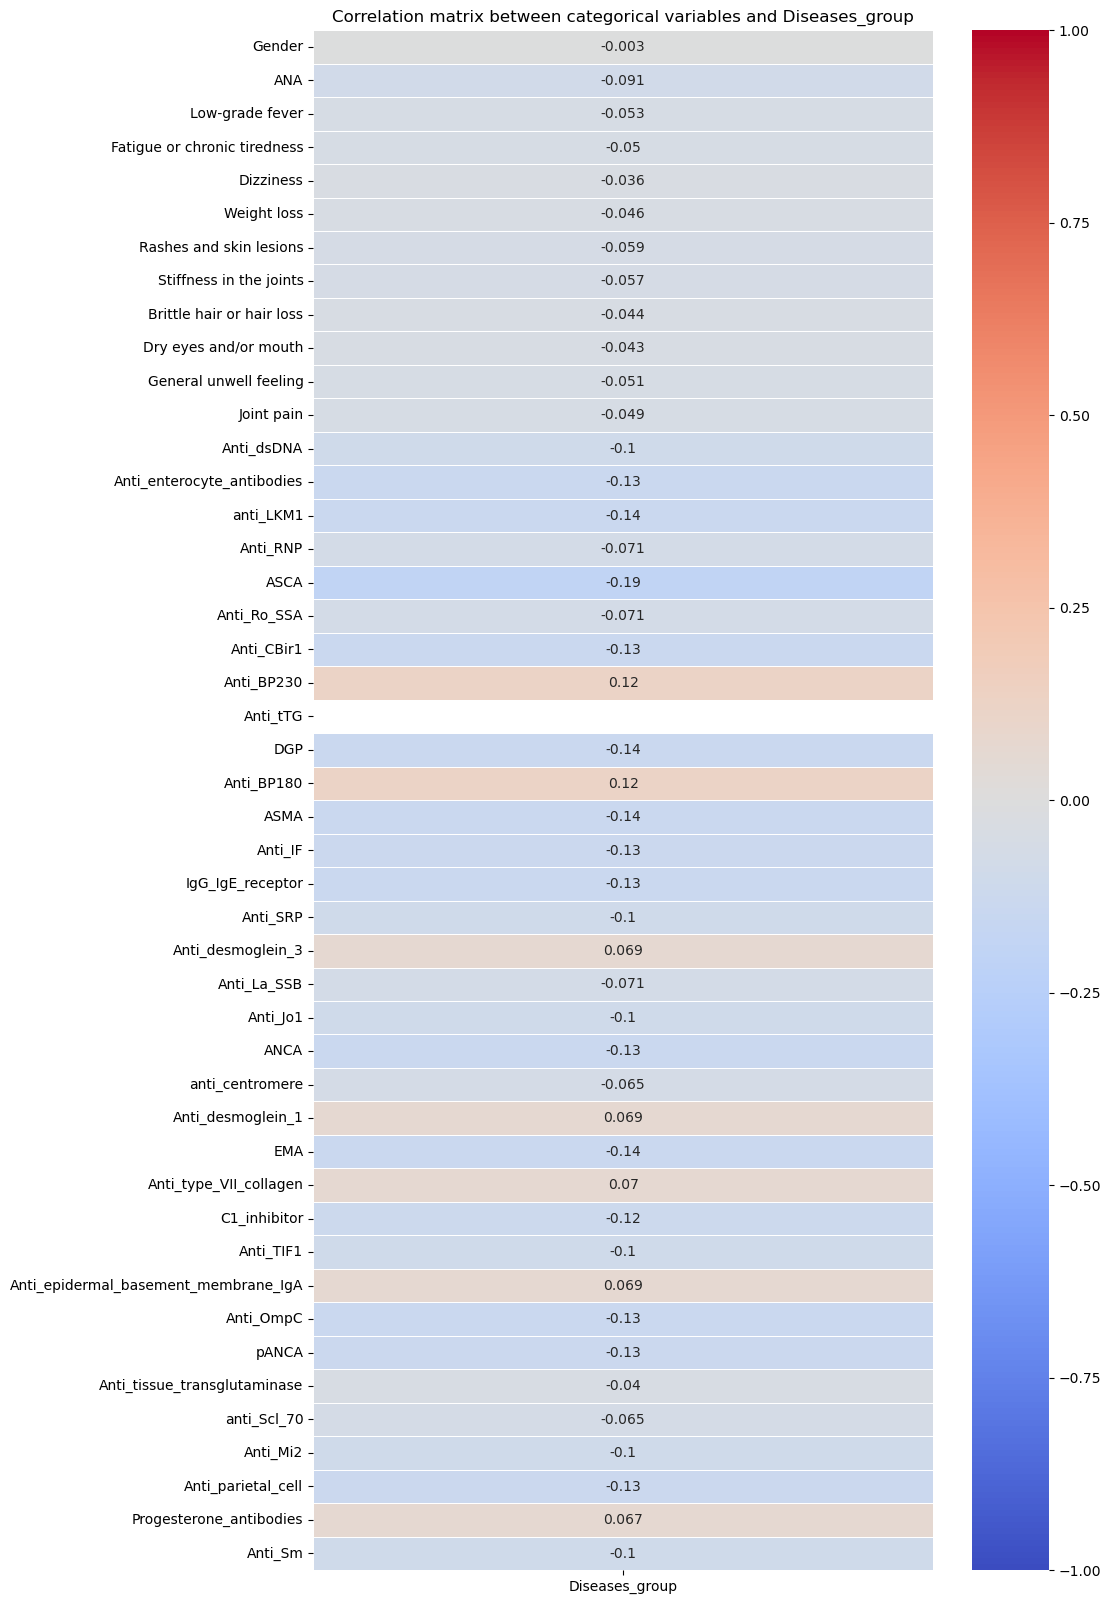

In [84]:
cat_var_y_corr_matrix = categorical_data.corr(method='spearman')

plt.figure(figsize=(10,20))
cat_diseases_corr = cat_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(cat_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between categorical variables and Diseases_group')
plt.show()

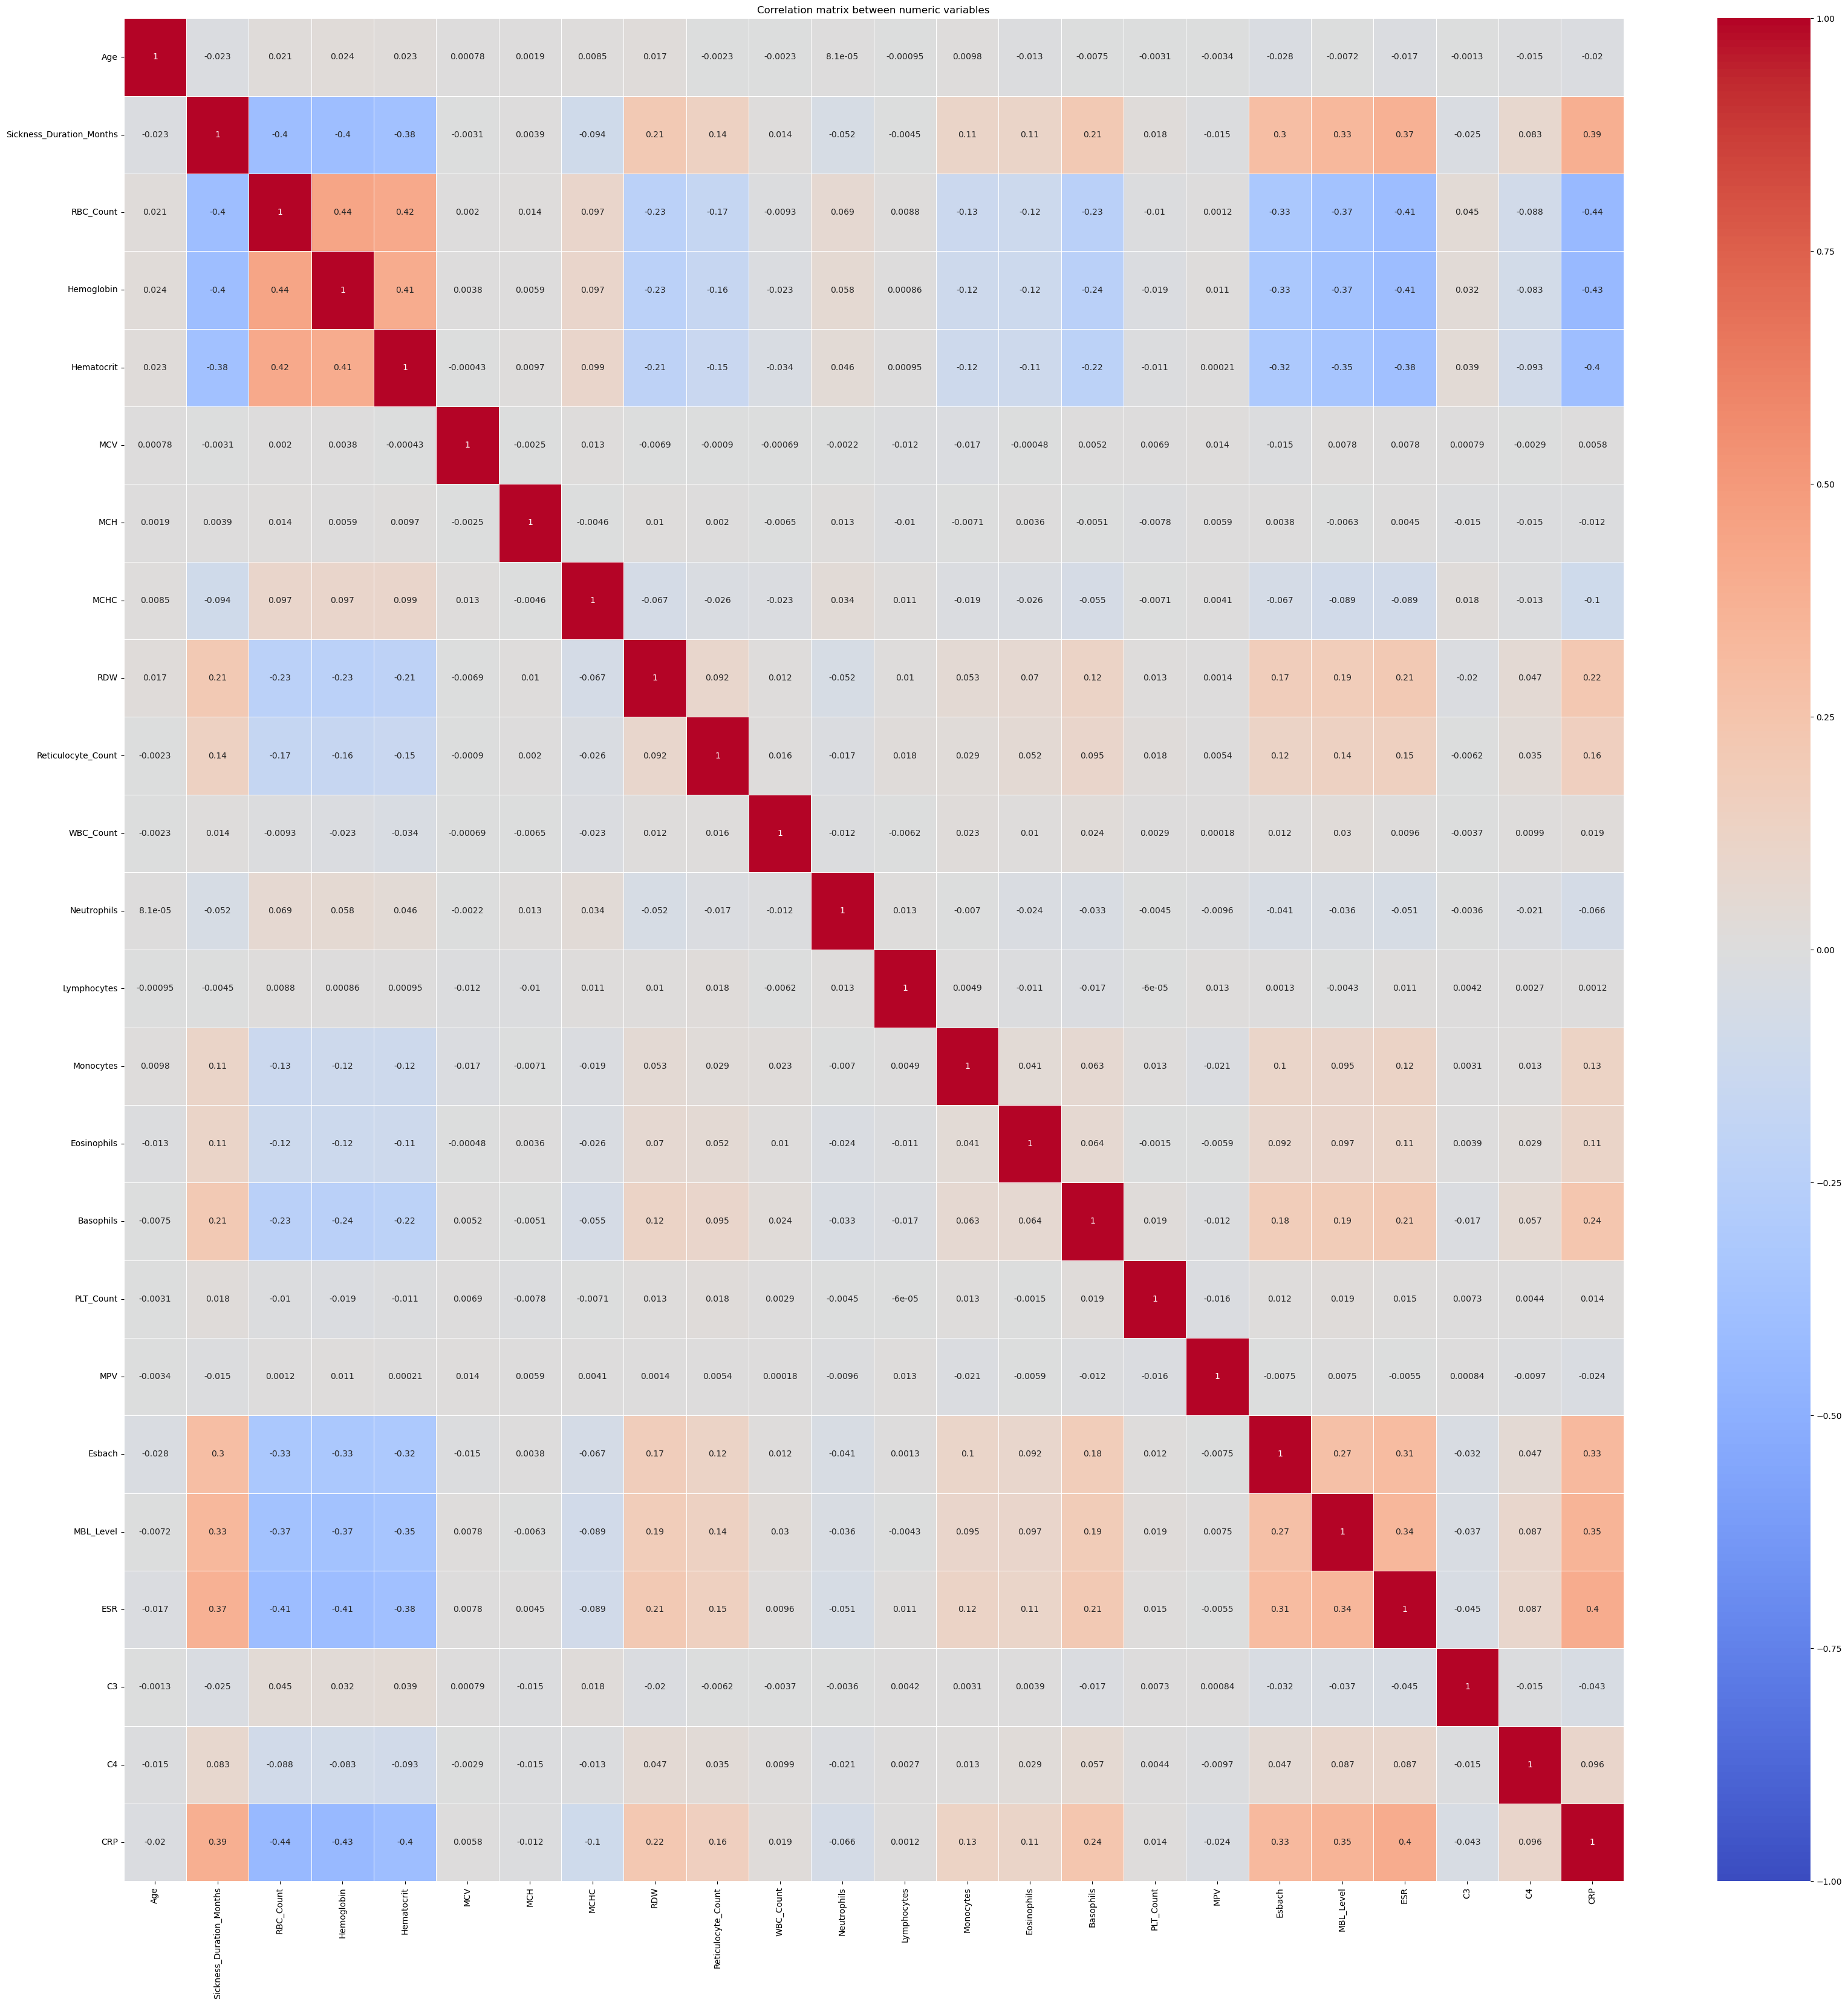

In [85]:
num_var_corr_matrix = numeric_data.drop(columns='Diseases_group',axis=1).corr(method='pearson')

# num_var_corr_matrix = numeric_data_prim.corr(method='pearson')

plt.figure(figsize=(40,40))
sns.heatmap(num_var_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables')
plt.show()

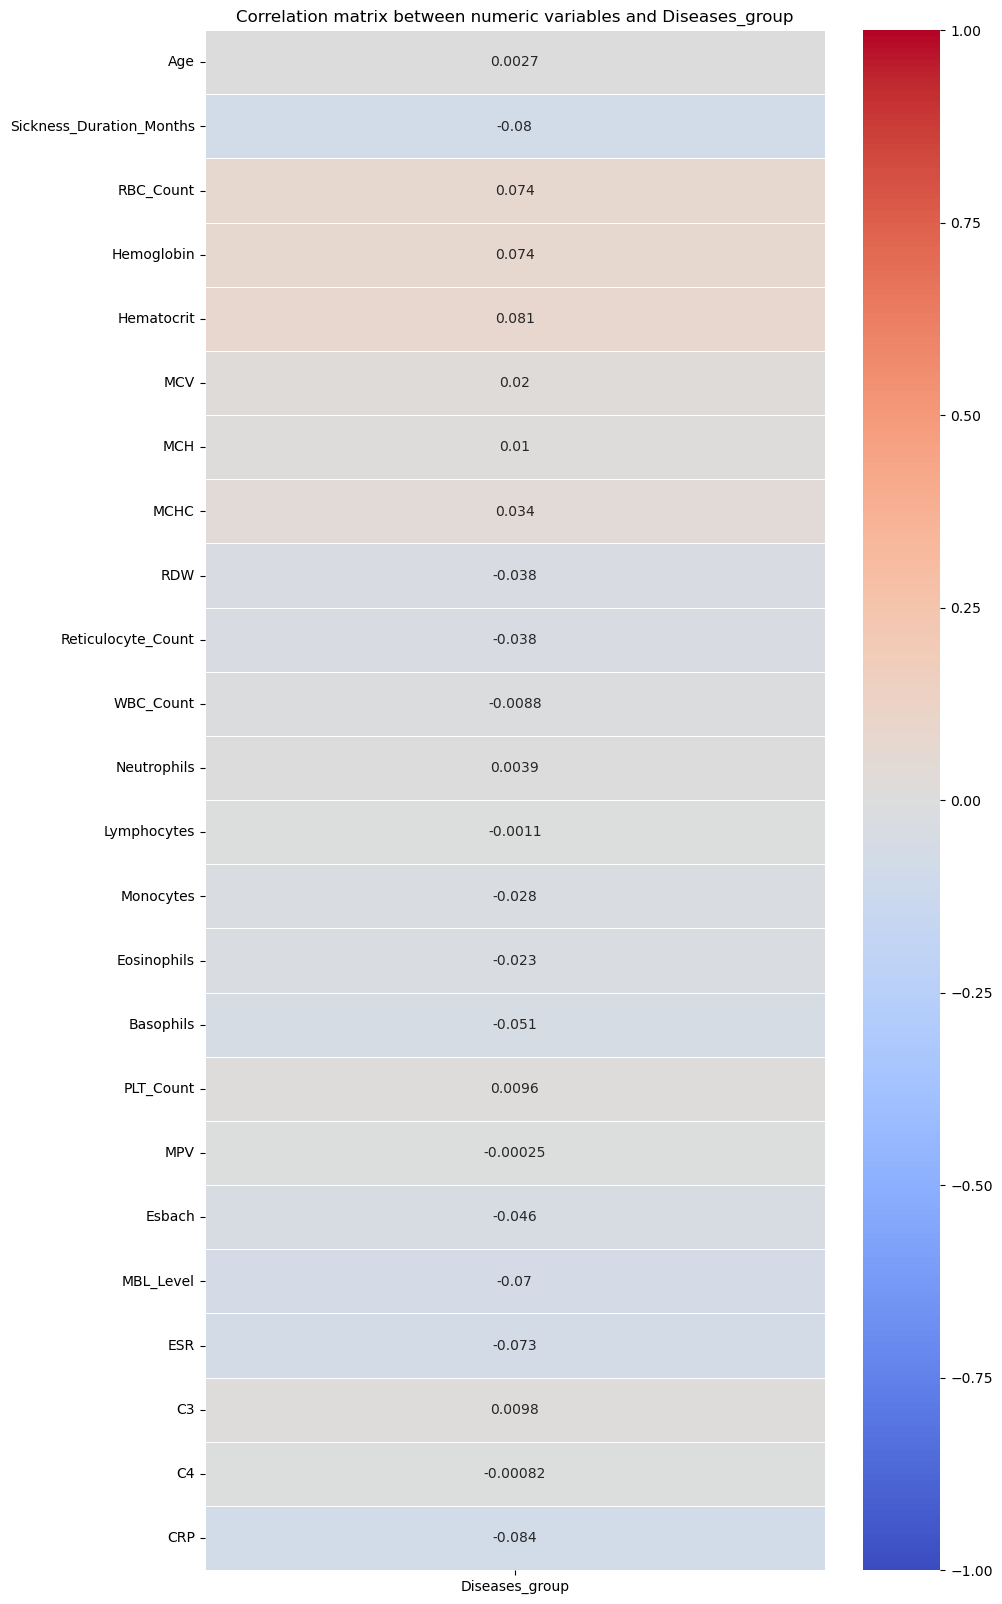

In [86]:
num_var_y_corr_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,20))
num_diseases_corr = num_var_y_corr_matrix[['Diseases_group']].drop('Diseases_group')
sns.heatmap(num_diseases_corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation matrix between numeric variables and Diseases_group')
plt.show()